In [3]:
from numpy import *
from matplotlib.pyplot import *
import util
import dr
import datasets
import runClassifier
import softmax
import utils

[[2.88678773 1.80266841]
 [1.80266841 3.77767117]]


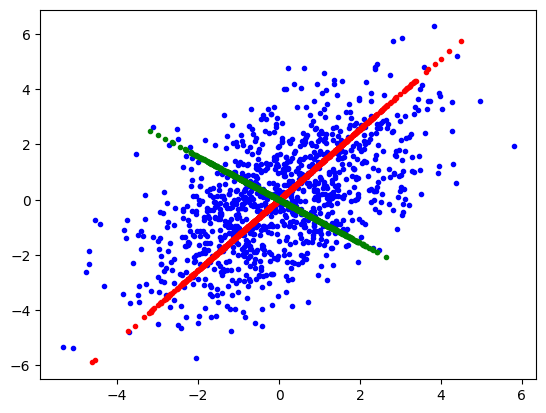

In [2]:
Si = util.sqrtm(array([[3,2],[2,4]]))
x = dot(random.randn(1000,2), Si)
# plot(x[:,0], x[:,1], 'b.')
# The sample covariance matrix. Random generated data cause result to vary
print(dot(x.T,x) / real(x.shape[0]-1))
(P,Z,evals) = dr.pca(x, 2)
x0 = dot(dot(x, Z[:,0]).reshape(1000,1), Z[:,0].reshape(1,2))
x1 = dot(dot(x, Z[:,1]).reshape(1000,1), Z[:,1].reshape(1,2))
plot(x[:,0], x[:,1], 'b.', x0[:,0], x0[:,1], 'r.', x1[:,0], x1[:,1], 'g.')
show()

**Qpca2 (10%):**

Plot the normalized eigenvalues (include the plot in your writeup).

How many eigenvectors do you have to include before you've accounted for 90% of the variance? 95%? (Hint: see function `cumsum`.)

first eigenvalues (before normalizing):
[0.05471459 0.04324574 0.03918324 0.03075898 0.02972407]

 81 eigenvectors explain 90% of variance
135 eigenvectors explain 90% of variance


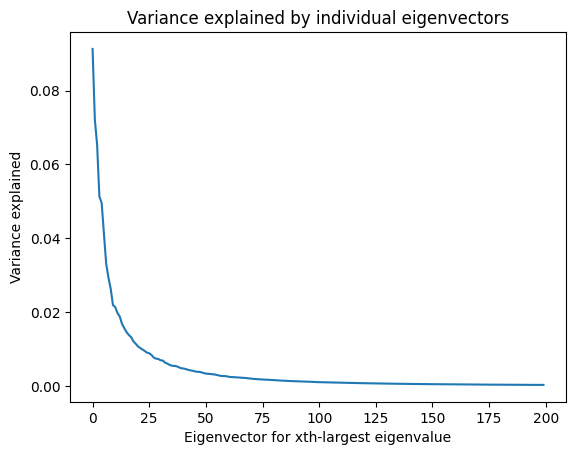

In [ ]:
# check PCA on eigendigits
(X,Y) = datasets.loadDigits()
(P,Z,evals) = dr.pca(X, 784)
print("first eigenvalues (before normalizing):")
print(evals[:5])
print("")

# find number of eigenvectors for 90%, 95% variance explained
normalize = lambda l: l/sum(l) # normalize entries so sum = 1
evals_norm = normalize(evals)
cum_variance = cumsum(evals_norm)
print(f"{sum(cum_variance<0.90):>3} eigenvectors explain 90% of variance")
print(f"{sum(cum_variance<0.95):>3} eigenvectors explain 95% of variance")

# plot normalized eigenvalues
max_x = 200 # 28**2 = 784 dimensions total, but they get small fast
plot(arange(max_x), evals_norm[:max_x])
title("Variance explained by individual eigenvectors")
xlabel("Eigenvector for xth-largest eigenvalue")
ylabel("Variance explained")
show()

**Qpca3 (5%):**

Do these look like digits? Should they?
Why or why not?
(Include the plot in your write-up.)
(Make sure you have got rid of the imaginary part in pca.)

They don't (and shouldn't) look like digits
because this is the aggregated data of every digit together.
The plots would look more like specific digits if
the data were filtered for specific digits.

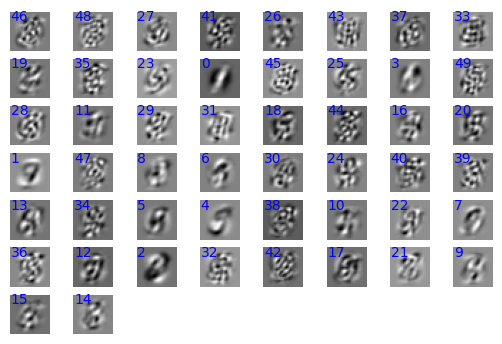

In [ ]:
# all digit data
(X,Y) = datasets.loadDigits()
(P,Z,evals) = dr.pca(X, 784)
util.drawDigits(Z.T[:50,:], arange(50))

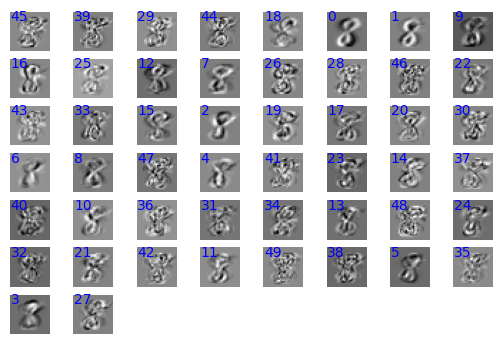

In [ ]:
# one digit data
(X,Y) = datasets.loadDigits()
digit = 8
X = X[Y==digit]
Y = Y[Y==digit]
(P,Z,evals) = dr.pca(X, 784)
util.drawDigits(Z.T[:50,:], arange(50))

**Qsr1 (10%)**

(1) Show that the probabilities sum to 1.

$
\begin{align}
\sum_i P[y=i]
& = \sum_i \frac{e^{\vec{w_i} \cdot \vec{x}}}{\sum_j e^{\vec{w_j} \cdot \vec{x}}} \\
&= \frac{1}{\sum_j e^{\vec{w_j} \cdot \vec{x}}} \sum_i e^{\vec{w_i} \cdot \vec{x}} \\
&= \frac{\sum_i e^{\vec{w_i} \cdot \vec{x}}}{\sum_j e^{\vec{w_j} \cdot \vec{x}}} \\
&= 1
\end{align}
$

(2) What are the dimensions of
$W$? 
$X$? 
$WX$?

$\vec{w_i} \cdot \vec{x_j}$ (indirectly) produces the estimated probability
that example $j$ is class $i$.

Row $\vec{w_i}$ of $W$ is the weight vector associated with class $i$.

Column $\vec{x_j}$ of $X$ is the vector of weights for example $j$.

If there are $n$ examples, $c$ classes, and $d$ dimensions in an example,
then the dimensions are as follows:

| Matrix |  Dimensions  |
|--------|--------------|
| $W$    | $c \times d$ |
| $X$    | $d \times n$ |
| $WX$   | $c \times n$ |


**Qsr2 (15%)**

(1) Complete the implementation of the cost function.

(2) Complete the implementation of the predict function.

Check your implementation by running: `python run_softmax.py`


In [ ]:
%run 'run_softmax.py'

Accuracy: 94.02%


**Qsr3 (10%)**

In the cost function, we see the line

```W_X = W_X - np.max(W_X)```

This means that each entry is reduced by the largest entry in the matrix.

(1) Show that this does not affect the predicted probabilities.

Any constant $b \in \mathbb{R}$ can be added to each element in `W_X`
(theoretically) without affecting the predicted probabilities:

$
\begin{align}
P[y=i]
&= \frac{e^{\vec{w_i} \cdot \vec{x}}}
        {\sum_j e^{\vec{w_j} \cdot \vec{x}}} \\
&= \frac{e^{\vec{w_i} \cdot \vec{x}}}
        {\sum_j e^{\vec{w_j} \cdot \vec{x}}}
   \cdot \frac{e^{b}}{e^{b}} \\
&= \frac{e^{b}e^{\vec{w_i} \cdot \vec{x}}}
        {e^{b}\sum_j e^{\vec{w_j} \cdot \vec{x}}} \\
&= \frac{e^{b}e^{\vec{w_i} \cdot \vec{x}}}
        {\sum_j e^{b} e^{\vec{w_j} \cdot \vec{x}}} \\
&= \frac{e^{\vec{w_i} \cdot \vec{x} + b}}
        {\sum_j e^{\vec{w_j} \cdot \vec{x} + b}} \\
\end{align}
$

(2) Why might this be an optimization over using `W_X`? Justify your answer.

Large positive values in $WX$ will result in extremely large values in $e^{w \cdot x}$.
This can result in overflow issues: the largest probabilities will show up as $\frac{\infty}{\infty}$ or NaN, while everything else will be 0.

Meanwhile, large negative values will result in values of $e^{w \cdot x}$
that are very close to 0, which will have minimal impact on resulting probabilities.

Consequently, it's preferable to keep the largest values from growing too large.
Subtracting the largest value from each entry solves this issue.


**Qsr4 (10%)**

Use the learningCurve function in runClassifier.py to plot the accuracy
of the classifier as a function of the number of examples seen.
Include the plot in your write-up.

Do you observe any overfitting or underfitting?
Discuss and expain what you observe.

Overfitting appears on smaller sample sizes:
the training accuracy is high, while the test accuracy is low.
This demonstrates the model's failure to generalize
from small training sample sizes.

Underfitting is not as visible in the graph of training data size vs. accuracy.
It would be more visible in a graph of epochs vs. accuracy,
where very early epochs would have both low training and testing accuracy.

In [ ]:
exSize = 28*28 # MNIST image size
numClasses = 10 # 10 digits
classifier = softmax.SoftmaxRegression(numClasses,exSize)

X,Y = utils.loadMNIST('data/train-images.idx3-ubyte', 'data/train-labels.idx1-ubyte')
Xte,Yte = utils.loadMNIST('data/t10k-images.idx3-ubyte', 'data/t10k-labels.idx1-ubyte')

output = runClassifier.learningCurve(classifier,numClasses,exSize,X,Y,Xte,Yte)


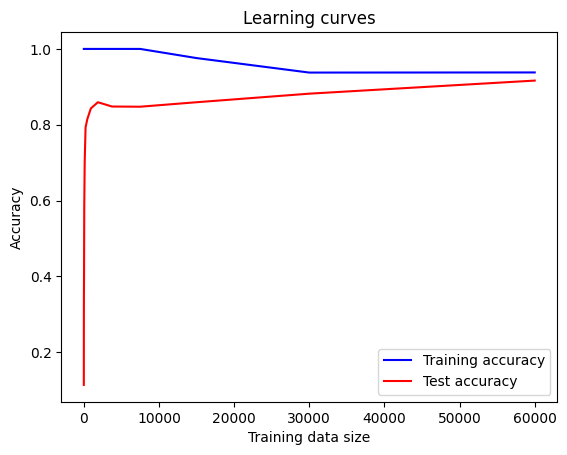

In [4]:
(dataSizes, trainAcc, testAcc) = output
plot(dataSizes, trainAcc, 'b-', dataSizes, testAcc, 'r-')
title("Learning curves")
xlabel("Training data size")
ylabel("Accuracy")
legend(("Training accuracy", "Test accuracy"))
show()


**Qnn1**

(20% for Qnn1.1, 1.2, 1.3 and 5% for Qnn 1.4)

Implement the NN. 
The scaffold has been built for you. Initialize the model and print the architecture with the following:

In [2]:
# qnn 1.1
from nn import NN, Relu, Linear, SquaredLoss
from utils import data_loader, acc, save_plot, loadMNIST, onehot
model = NN(Relu(), SquaredLoss(), hidden_layers=[128,128])
model.print_model()

activation:Relu
loss function:SquaredLoss
Layer 1	w:(128, 784)	b:(128, 1)
Layer 2	w:(128, 128)	b:(128, 1)
Layer 3	w:(10, 128)	b:(10, 1)


In [5]:
# qnn 1.2
x_train, label_train = loadMNIST('data/train-images.idx3-ubyte', 'data/train-labels.idx1-ubyte')
x_test, label_test = loadMNIST('data/t10k-images.idx3-ubyte', 'data/t10k-labels.idx1-ubyte')
y_train = onehot(label_train)
y_test = onehot(label_test) 

model = NN(Relu(), SquaredLoss(), hidden_layers=[128, 128], input_d=784, output_d=10)
model.print_model()
training_data, dev_data = {"X":x_train, "Y":y_train}, {"X":x_test, "Y":y_test}
from run_nn import train_1pass
model, plot_dict = train_1pass(model, training_data, dev_data, learning_rate=1e-2, batch_size=64)

activation:Relu
loss function:SquaredLoss
Layer 1	w:(128, 784)	b:(128, 1)
Layer 2	w:(128, 128)	b:(128, 1)
Layer 3	w:(10, 128)	b:(10, 1)
#Samples  6400	loss:0.49038	dev_acc:0.54200
#Samples 12800	loss:0.34871	dev_acc:0.68320
#Samples 19200	loss:0.29765	dev_acc:0.73160
#Samples 25600	loss:0.27253	dev_acc:0.76920
#Samples 32000	loss:0.25077	dev_acc:0.80060
#Samples 38400	loss:0.23657	dev_acc:0.81110
#Samples 44800	loss:0.22692	dev_acc:0.83320
#Samples 51200	loss:0.21559	dev_acc:0.84350
#Samples 57600	loss:0.20563	dev_acc:0.84950


In [4]:
%run run_nn.py
# qnn 1.3

activation:Relu
loss function:SquaredLoss
Layer 1	w:(256, 784)	b:(256, 1)
Layer 2	w:(256, 256)	b:(256, 1)
Layer 3	w:(10, 256)	b:(10, 1)
Epoch   1/20	loss:0.22577	dev_acc:0.83330
Epoch   2/20	loss:0.17361	dev_acc:0.88130
Epoch   3/20	loss:0.16170	dev_acc:0.89990
Epoch   4/20	loss:0.14324	dev_acc:0.90980
Epoch   5/20	loss:0.14362	dev_acc:0.91650
Epoch   6/20	loss:0.13566	dev_acc:0.92300
Epoch   7/20	loss:0.10596	dev_acc:0.92760
Epoch   8/20	loss:0.09789	dev_acc:0.93150
Epoch   9/20	loss:0.11568	dev_acc:0.93400
Epoch  10/20	loss:0.09745	dev_acc:0.93550
Epoch  11/20	loss:0.11528	dev_acc:0.93870
Epoch  12/20	loss:0.11201	dev_acc:0.94060
Epoch  13/20	loss:0.09773	dev_acc:0.94210
Epoch  14/20	loss:0.07697	dev_acc:0.94270
Epoch  15/20	loss:0.10416	dev_acc:0.94410
Epoch  16/20	loss:0.09141	dev_acc:0.94520
Epoch  17/20	loss:0.07368	dev_acc:0.94570
Epoch  18/20	loss:0.07876	dev_acc:0.94620
Epoch  19/20	loss:0.08532	dev_acc:0.94630
Epoch  20/20	loss:0.06715	dev_acc:0.94760


**Qnn1.4** (No implementation needed for this question).

When initializing the weight matrix, in some cases it may be appropriate
to initialize the entries as small random numbers rather than all zeros.
Give one reason why this may be a good idea.

Initial weights via a random distribution (rather than all 0) helps break symmetry
so multiple nodes don't learn the same features.
